Total downtime was 3380.9 seconds.


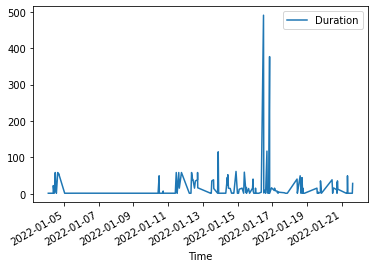

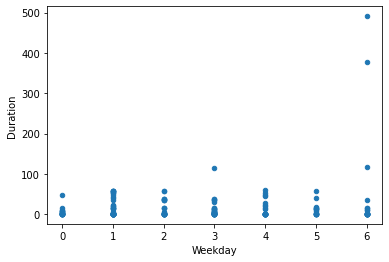

In [67]:
import pandas
from datetime import datetime
import calendar

# Helper functions
def parse_time_str(str):
    return datetime.strptime(str.strip().split('.')[0],'%Y-%m-%d %H:%M:%S')

def parse_duration(str):
    stripped_str = str.strip()
    return float(stripped_str[2:5])

def add_weekdays(col):
    return col['Time'].weekday()

converters = {'Time': parse_time_str, 'Duration':parse_duration}

# Load data
internet_df = pandas.read_csv('internet.log', names=['Event', 'Time', 'Duration'], header=0, converters=converters)
internet_df['Weekday'] = internet_df.apply(add_weekdays, axis=1)

# Plot data
internet_df.plot('Time','Duration',kind='line')
internet_df.plot('Weekday', 'Duration', kind='scatter')



In [79]:
# Calculate statistics

total_downtime_minutes = internet_df['Duration'].sum()/60.0
observation_duration = internet_df['Time'].iloc[-1] - internet_df['Time'].iloc[0]
availability_percentage = (1.0 - total_downtime_minutes/(observation_duration.days*24*60 + observation_duration.seconds/60))*100
print("Total downtime was " + str(total_downtime_minutes) + " minutes.")
print("Observation time was " + str(observation_duration) + ".")
print("Availability was " + str(availability_percentage) + " %.")

Total downtime was 56.348333333333336 minutes.
Observation time was 17 days 13:08:03.
Availability was 0.002230023026443803 %.
